In [56]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 

plt.rcParams['figure.figsize'] = (16, 5)
plt.style.use('fivethirtyeight')

In [57]:
data = pd.read_csv('med-insurance.csv')

In [58]:
data.shape

(1338, 7)

In [59]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [60]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [61]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [62]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [88]:
y = data['expenses']
x = data.drop(['expenses'], axis = 1)

### Univariate Analysis

/Users/nukagvilia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



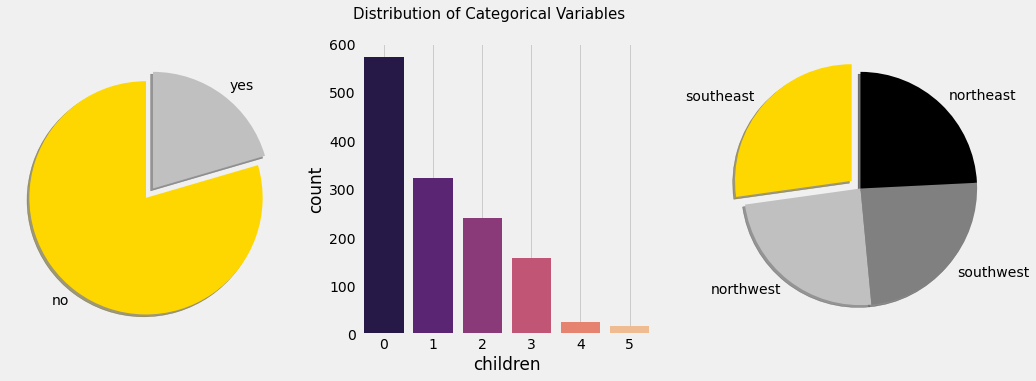

In [63]:
plt.subplot(1,3,1)
plt.pie(data['smoker'].value_counts().values, 
        labels = data['smoker'].value_counts().index,
        colors = ['gold', 'silver'],
        explode = [0.1, 0], 
        shadow = True,
        startangle = 90
       )

plt.subplot(1,3,2)
sns.countplot(data['children'], palette = 'magma')
plt.grid()

plt.subplot(1,3,3)
plt.pie(data['region'].value_counts().values,
        labels = data['region'].value_counts().index,
        colors = ['gold', 'silver', 'grey', 'black'], 
        explode = [0.1, 0, 0, 0],
        shadow = True,
        startangle = 90)
plt.suptitle('Distribution of Categorical Variables', fontsize = 15)
plt.show()

/Users/nukagvilia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/nukagvilia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/nukagvilia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for 

Text(0.5, 0.98, 'Distribution of Numeric Variables')

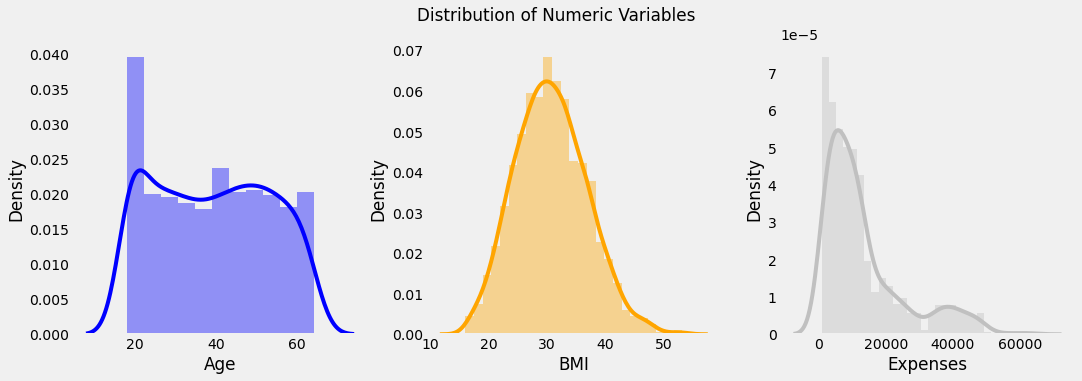

In [64]:
plt.subplot(1, 3, 1)
sns.distplot(data['age'], color = 'blue')
plt.xlabel('Age')
plt.grid()

plt.subplot(1, 3, 2)
sns.distplot(data['bmi'], color = 'orange')
plt.xlabel('BMI')
plt.grid()

plt.subplot(1, 3, 3)
sns.distplot(data['expenses'], color = 'silver')
plt.xlabel('Expenses')
plt.grid()

plt.suptitle('Distribution of Numeric Variables')

### Bivariate Analysis

In [65]:
# Relationship between age and expenses
px.scatter(data, y = 'expenses', x = 'age', marginal_y = 'violin', trendline = 'ols')

In [66]:
# Relationship between bmi and expenses 
px.scatter(data, y = 'expenses', x = 'bmi', marginal_y = 'violin', trendline = 'ols')

/Users/nukagvilia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/nukagvilia/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0.98, 'Impact of the Number of Children and Being a Smoker on Medical Expenses')

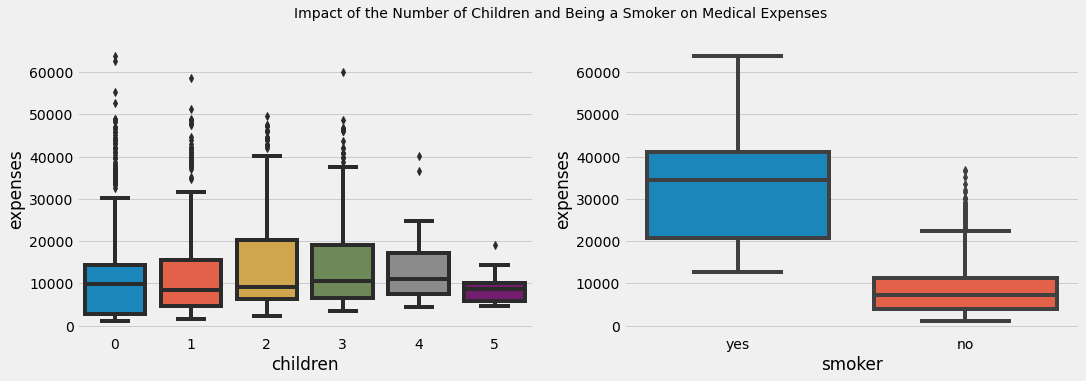

In [67]:
# Relationship between expenses and number of children 
plt.subplot(1,2,1)
sns.boxplot(data['children'], data['expenses'])

plt.subplot(1,2,2)
sns.boxplot(data['smoker'], data['expenses'])

plt.suptitle('Impact of the Number of Children and Being a Smoker on Medical Expenses', fontsize = 14)

In [68]:
px.scatter(data, y = 'expenses', x = 'age', facet_row = 'children', facet_col = 'region', color = 'smoker',
           trendline = 'ols')

In [69]:
px.scatter(data, y = 'expenses', x = 'bmi', facet_row = 'children', facet_col = 'region', color = 'smoker',
           trendline = 'ols')

In [70]:
from bubbly.bubbly import bubbleplot

In [71]:
px.bar_polar(data, r='expenses', theta='region', color='sex', template = 'plotly_dark', 
             color_discrete_sequence = px.colors.sequential.Plasma_r)

This plot shows that the Southeast region has the higest expenses, as well as that males spend more on medical expenses than females. 

In [72]:
data[['expenses', 'region']].groupby(['region']).agg(['min', 'max', 'mean'])

expenses                        
               min       max          mean
region                                    
northeast  1694.80  58571.07  13406.384691
northwest  1621.34  60021.40  12417.575169
southeast  1121.87  63770.43  14735.411538
southwest  1241.57  52590.83  12346.937908

### Data Processing

In [73]:
data['sex'] = data['sex'].replace(('male', 'female'), (2,1))
data['smoker'] = data['smoker'].replace(('yes', 'no'), (1, 0))
data['region'] = data['region'].replace(('southeast', 'southwest', 'northeast', 'northwest'), (1,0,0,0))

# Cap the region column since 
data.select_dtypes('object').columns

Index([], dtype='object')

In [74]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,0,16884.92
1,18,2,33.8,1,0,1,1725.55
2,28,2,33.0,3,0,1,4449.46
3,33,2,22.7,0,0,0,21984.47
4,32,2,28.9,0,0,0,3866.86


In [75]:
y = data['expenses']
X = data.drop(['expenses'], axis = 1)

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [77]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Building a model

In [78]:
# 1. Linear Regression model
from sklearn.linear_model import LinearRegression

lm_1 = LinearRegression()
lm_1.fit(X_train, y_train)

y_pred_lm = lm_1.predict(X_test)

In [79]:
# Evaluating the linear model using R-squared and RMSE 

from sklearn.metrics import r2_score, mean_squared_error

r_sqrd = r2_score(y_test, y_pred_lm)
MSE = mean_squared_error(y_test, y_pred_lm)
RMSE = np.sqrt(MSE)

print(r_sqrd)
print(RMSE)

0.7984378814790315
5663.441749764154


In [80]:
# 2. Random Forest Model 

from sklearn.ensemble import RandomForestRegressor

rand_forest = RandomForestRegressor()
rand_forest.fit(X_train, y_train)

RandomForestRegressor()

In [81]:
y_pred_random_f = rand_forest.predict(X_test)

In [82]:
MSE = mean_squared_error(y_test, y_pred_random_f)
RMSE = np.sqrt(MSE)

r_sqrd = r2_score(y_test, y_pred_random_f)

print(r_sqrd)
print(RMSE)

0.8799246719517704
4371.22208356944


The RMSE for the random forest model is lower than that of the linear regression model. And the R-squared is higher. Random forest model works better for these data than linear regression.

In [83]:
# Gradient boosting 

from sklearn.ensemble import GradientBoostingRegressor 

grad_boost = GradientBoostingRegressor()
grad_boost.fit(X_train, y_train)
y_pred_grad_boost = grad_boost.predict(X_test)

In [84]:
MSE = mean_squared_error(y_test, y_pred_grad_boost)
RMSE = np.sqrt(MSE)

r_sqrd = r2_score(y_test, y_pred_grad_boost)

print(r_sqrd)
print(RMSE)

0.8959959879759962
4068.1881200780263


In [85]:
# Try to identify a good ensemble of models 

# Average of all three models 
avg_model = (y_pred_lm + y_pred_random_f + y_pred_grad_boost) / 3

MSE = mean_squared_error(y_test, avg_model)
RMSE = np.sqrt(MSE)
r_sqrd = r2_score(y_test, avg_model)

print(RMSE)
print(r_sqrd)

4250.147105478346
0.8864842919397888


In [86]:
# Weighted average of all three models 

weight_avg_model = 0.2*y_pred_lm + 0.3*y_pred_random_f + 0.5*y_pred_grad_boost

MSE = mean_squared_error(y_test, weight_avg_model)
RMSE = np.sqrt(MSE)
print(rmse)

r_sqrd = r2_score(y_test, weight_avg_model)
print(r_sqrd)

4140.418645558629
0.8930296971882533


In [90]:
# 5-fold cross validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(grad_boost, x, y, cv=5)
print(scores)

[0.88026715 0.79757234 0.8885396  0.84752276 0.85906217]


### Comparison of Models

Text(0.5, 1.0, 'Comparison of R-Squared Values')

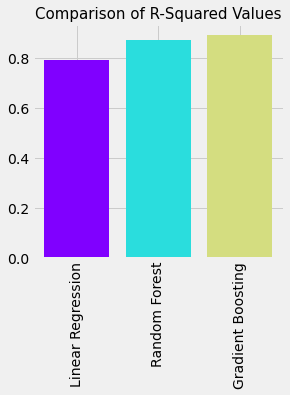

In [93]:
r2 = np.array([0.79, 0.87, 0.89])
labels = np.array(['Linear Regression', 'Random Forest', 'Gradient Boosting'])
index = np.argsort(r2)
color = plt.cm.rainbow(np.linspace(0,1,4))

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (4,4)

plt.bar(range(len(index)), r2[index], color = color)
plt.xticks(range(0,3), ['Linear Regression', 'Random Forest', 'Gradient Boosting'], rotation = 90)
plt.title('Comparison of R-Squared Values', fontsize = 15)

### Possible Improvements

1. Instead of encoding the regions with only 1 and 2, we could encode them some other way to better incorporate every region in the model.
2. We could transform the Expense variable using the log or square root transformation.
3. Keep the number of children instead of capping them at 4 and 5. 